*Question 1*

In [5]:
import numpy as np

def fn(k0, N):
    y_N = [0] * N  # Initialize list of length N with 0s

    for i in range(N):
        for j in range(N):
            # Correct indexing: y_N[i] should accumulate the sum for each i
            y_N[i] += np.cos((2 * np.pi * k0 * j) / N) * np.cos((np.pi * i * (j + 0.5)) / N)

    return y_N

# Example usage
result = fn(10, 64)
print(result)
print("Sum of result:", sum(result))



[-1.4432899320127035e-15, 1.0024156789870133, -4.440892098500626e-16, 1.0221843844053073, 5.440092820663267e-15, 1.0642435037879723, -6.5503158452884236e-15, 1.1344984466006869, 4.3298697960381105e-15, 1.244567591009703, -4.6629367034256575e-15, 1.4175704033853456, -1.9984014443252818e-15, 1.704099465891531, 6.5503158452884236e-15, 2.2367449360983995, 5.10702591327572e-15, 3.502944271625644, 3.1086244689504383e-15, 9.892465822697075, 28.221480459147354, -9.325198357927036, -3.2862601528904634e-14, -2.9330755279495633, 1.1213252548714081e-14, -1.6615986702365046, 1.915134717478395e-14, -1.120843787692511, -1.2823075934420558e-14, -0.8231248164077347, -1.7930101847696278e-14, -0.6354893115317277, 2.7755575615628914e-16, -0.5068361409321189, 1.7208456881689926e-15, -0.4133406834168825, -1.1157741397482823e-14, -0.3424044719229958, -1.0547118733938987e-14, -0.2867425717223021, -1.6209256159527285e-14, -0.241850007465584, 3.0031532816110484e-14, -0.20479028019248874, -1.0103029524088925e-14

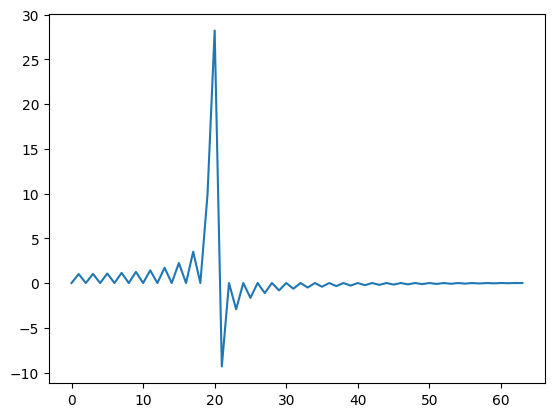

In [6]:
import matplotlib.pyplot as plt

q = np.arange(0,64)
plt.plot(q, fn(10,64))
plt.show()

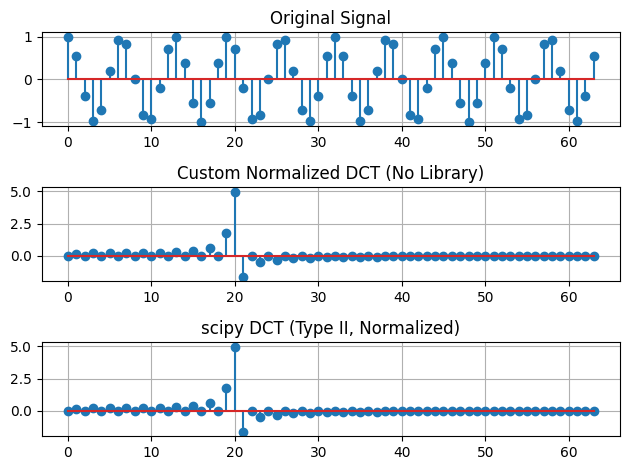

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

def fn(k0, N, norm=False):
    y_N = [0] * N

    for i in range(N):
        for j in range(N):
            y_N[i] += np.cos((2 * np.pi * k0 * j) / N) * np.cos((np.pi * i * (j + 0.5)) / N)

    if norm:
        for i in range(N):
            if i == 0:
                y_N[i] *= np.sqrt(1 / N)  # Normalization for k = 0
            else:
                y_N[i] *= np.sqrt(2 / N)  # Normalization for k > 0

    return y_N
N = 64
n = np.arange(N)
k = 10
x_n = np.cos(2 * np.pi * n *k / N)

dct_custom_norm = fn(10, N, norm=True)

dct_scipy = dct(x_n, type=2, norm='ortho')
plt.subplot(3, 1, 1)
plt.stem(n, x_n)
plt.title("Original Signal")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(np.arange(N), dct_custom_norm)
plt.title("Custom Normalized DCT (No Library)")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(np.arange(N), dct_scipy)
plt.title("scipy DCT (Type II, Normalized)")
plt.grid(True)

plt.tight_layout()

plt.show()


*Question2*

In [33]:



def f1(M, k1):
    y_M = [0] * M
    for p in range(M):
        for k in range(M):
            y_M[p] += np.cos((2 * np.pi * k1 * k) / M) * np.cos((np.pi * p * (k + 0.5)) / M)
    return y_M


def fn2(N, k2):
    y_N = [0] * N
    for i in range(N):
        for j in range(N):
            y_N[i] += np.sin((2 * np.pi * k2 * j) / N) * np.cos((np.pi * i * (j + 0.5)) / N)
    return y_N



M, N = 48, 32
k1, k2 = 5, 12


result_f1 = f1(M, k1)
result_fn2 = fn2(N, k2)

result_2d_dct = np.outer(result_f1, result_fn2)



max_coords = np.unravel_index(np.argmax(result_2d_dct), result_2d_dct.shape)
print(max_coords)

(10, 23)


In [30]:
## IMAGE OF X{M,N]
y_M = []
M = 48
for k in range(M):
   y_M.append(np.cos((2 * np.pi * k1 * k) / M))

y_N = []
N = 32
for j in range(N):

  y_N.append(np.sin((2 * np.pi * k2 * j) / N))




x_1 = np.cos(2*np.pi*5*m/M)
x_2 = np.sin(2*np.pi*12*n/N)
x_1 = np.reshape(x_1,[M,1])
x_2 = np.reshape(x_2,[1,N])
x = x_1*x_2
y_1 = np.zeros([M,N])
for k in range(0,M,1):
  y_1[k,:] = dct(x[k,:])
for k in range(0,N,1):
  y_1[:,k] = dct(y_1[:,k])





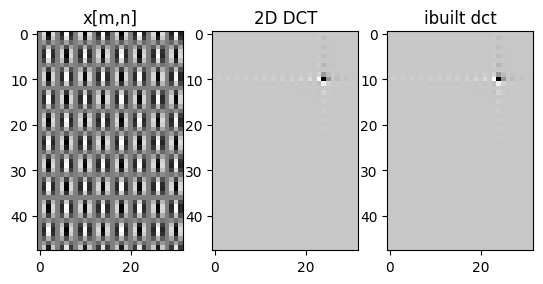

In [44]:
plt.subplot(1,3,1)
plt.title("x[m,n]")
plt.imshow(np.outer(y_M, y_N), cmap = "gray")
plt.subplot(1,3,2)
plt.title("2D DCT")
plt.imshow(result_2d_dct, cmap='gray')
plt.subplot(1,3,3)
plt.title("ibuilt dct")
plt.imshow(y_1, cmap = "gray")

plt.savefig("question2 part 1.pdf", format="pdf")



(256, 256)

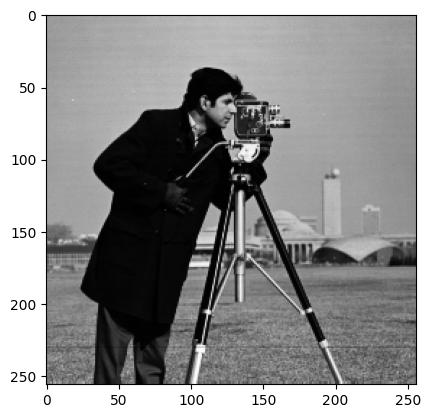

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
image = Image.open("cameraman.tif")
im = np.asarray(image)
plt.imshow(im,cmap= "gray")
im.shape


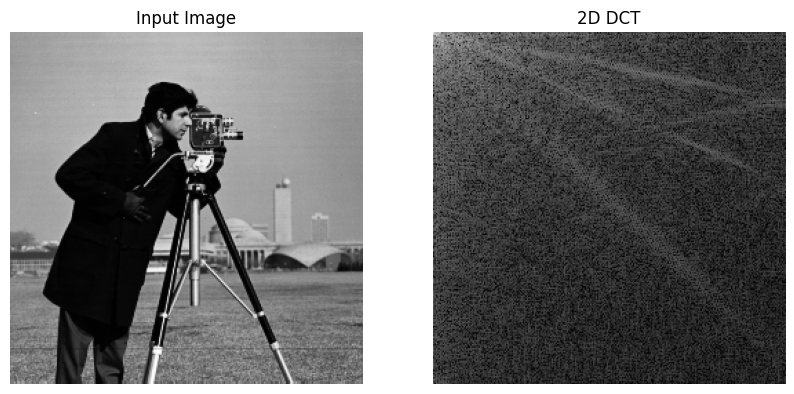

Maximum DCT coefficient at: (0, 0)
Maximum DCT value: 30393.46875


(256, 256)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def dct_1d(x):
    N = len(x)
    y = np.zeros(N)
    for i in range(N):
        scale = np.sqrt(1 / N) if i == 0 else np.sqrt(2 / N)  # Scaling factor for orthonormality
        for j in range(N):
            y[i] += x[j] * np.cos((np.pi * i * (j + 0.5)) / N)
        y[i] *= scale
    return y

def dct_2d(image):
    rows_transformed = np.array([dct_1d(row) for row in image])
    cols_transformed = np.array([dct_1d(col) for col in rows_transformed.T]).T
    return cols_transformed

im = Image.open("cameraman.tif").convert("L")
image = np.asarray(im, dtype=np.float32)

result_dct = dct_2d(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.log1p(np.abs(result_dct)), cmap="gray")
plt.title("2D DCT")
plt.axis("off")

plt.show()

max_coords = np.unravel_index(np.argmax(result_dct), result_dct.shape)
print("Maximum DCT coefficient at:", max_coords)
print("Maximum DCT value:", result_dct[max_coords])
result_dct.shape


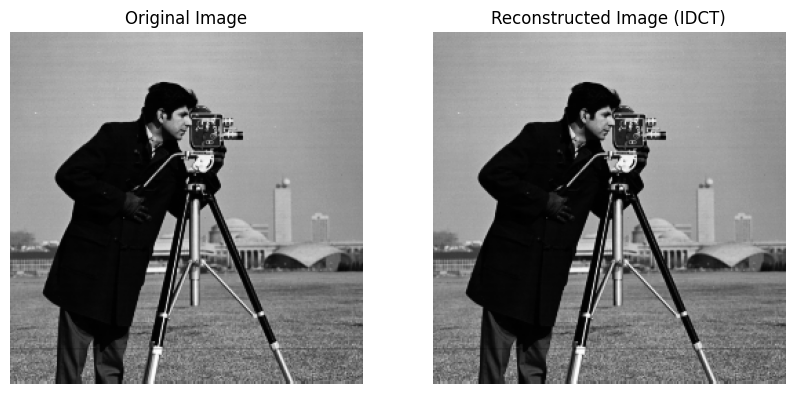

(256, 256)

In [40]:
def idct_1d(y):
    N = len(y)
    x = np.zeros(N)
    for j in range(N):
        for i in range(N):
            scale = np.sqrt(1 / N) if i == 0 else np.sqrt(2 / N)  # Scaling factor for orthonormality
            x[j] += scale * y[i] * np.cos((np.pi * i * (j + 0.5)) / N)
    return x


def idct_2d(transformed_image):
    cols_transformed = np.array([idct_1d(col) for col in transformed_image.T]).T
    rows_transformed = np.array([idct_1d(row) for row in cols_transformed])
    return rows_transformed

reconstructed_image = idct_2d(result_dct)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image (IDCT)")
plt.axis("off")

plt.show()
reconstructed_image.shape

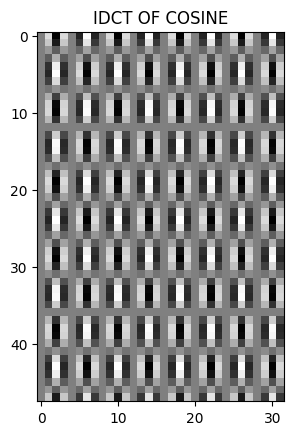

In [42]:
reconstructed_image2 = idct_2d(result_2d_dct)

plt.title("IDCT OF COSINE")
plt.imshow(reconstructed_image2, cmap="gray")


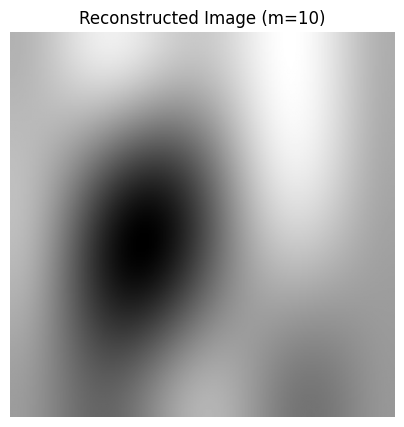

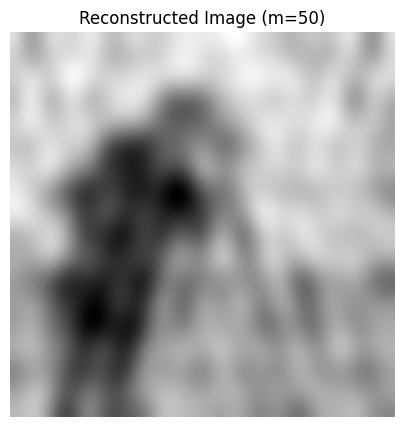

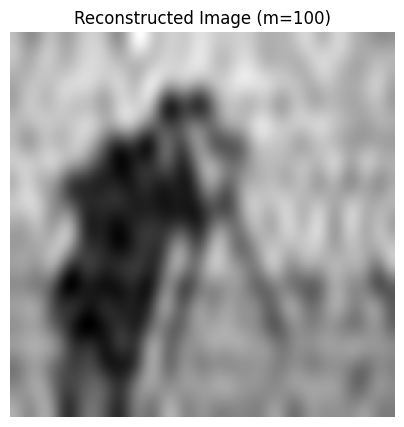

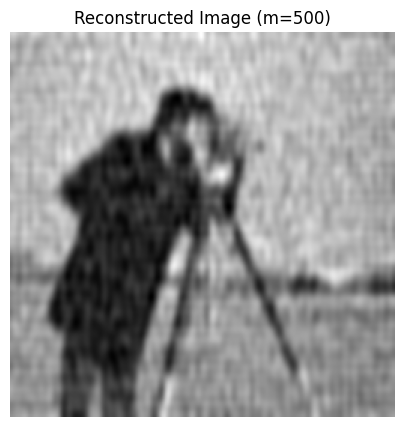

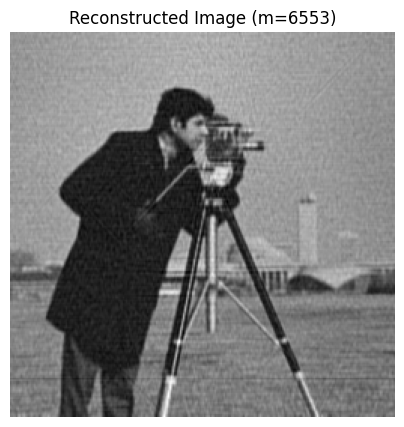

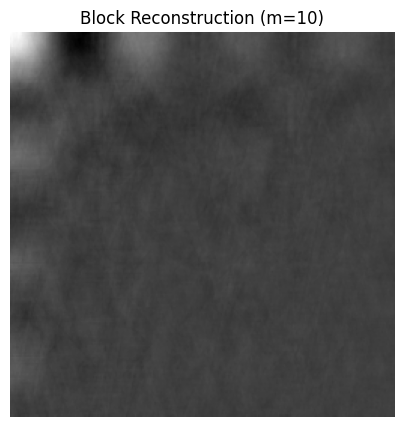

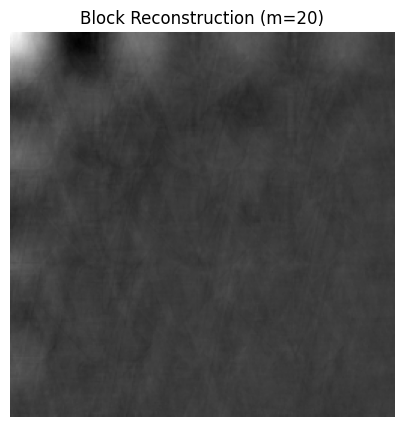

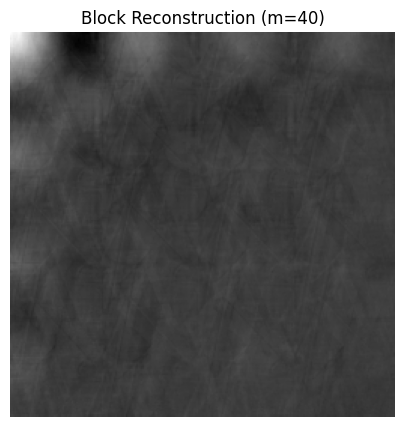

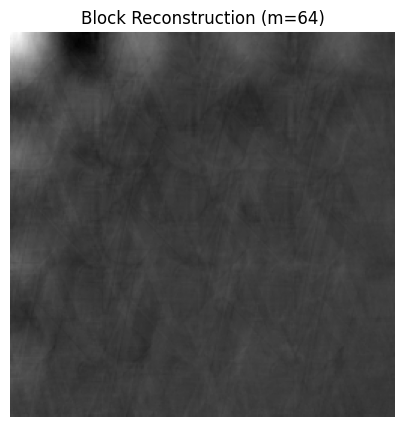

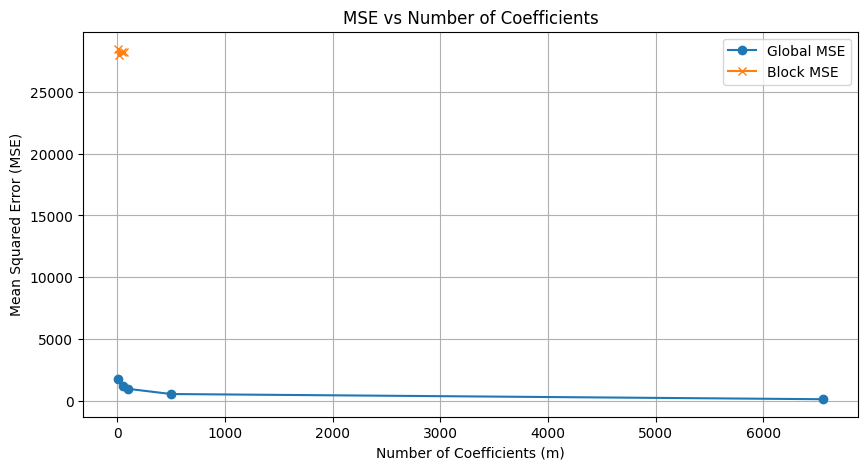

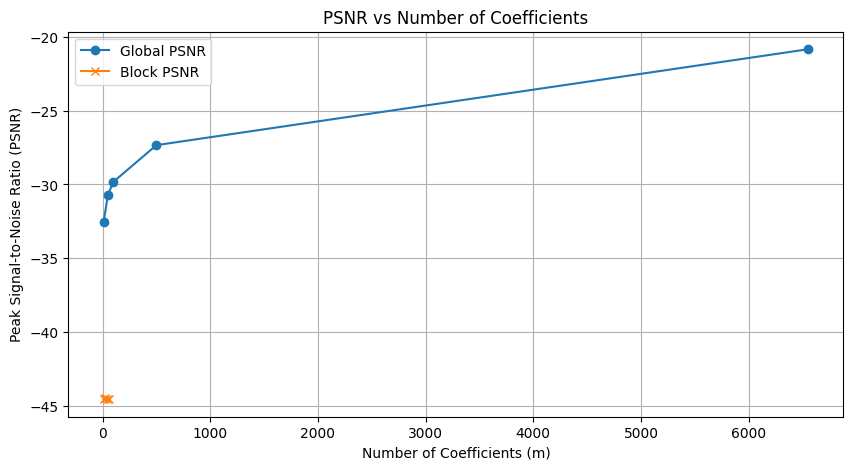

In [43]:
import numpy as np
import matplotlib.pyplot as plt


def retain_top_m_coefficients(dct_image, m):

    flattened = dct_image.flatten()
    sorted_indices = np.argsort(np.abs(flattened))[::-1]
    mask = np.zeros_like(flattened)
    mask[sorted_indices[:m]] = 1
    masked_dct = flattened * mask
    return masked_dct.reshape(dct_image.shape)

def block_process(image, block_size, m, process_func):

    M, N = image.shape
    processed_image = np.zeros_like(image)
    for i in range(0, M, block_size):
        for j in range(0, N, block_size):
            block = image[i:i+block_size, j:j+block_size]
            processed_block = process_func(block, m)
            processed_image[i:i+block_size, j:j+block_size] = processed_block
    return processed_image

def compute_reconstruction_error(original, reconstructed):

    mse = np.mean((original - reconstructed) ** 2)
    psnr = 10 * np.log10(1 / mse) if mse > 0 else float('inf')
    return mse, psnr

m_values = [10, 50, 100, 500, result_dct.size // 10]
errors_global = []

for m in m_values:
    top_m_dct = retain_top_m_coefficients(result_dct, m)
    reconstructed_image = idct_2d(top_m_dct)
    mse, psnr = compute_reconstruction_error(im, reconstructed_image)
    errors_global.append((mse, psnr))

    plt.figure(figsize=(5, 5))
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"Reconstructed Image (m={m})")
    plt.axis("off")
    plt.show()

block_size = 8
m_values_block = [10, 20, 40, 64]
errors_block = []

for m in m_values_block:
    def process_block(block, m):
        block_dct = block.copy()
        return idct_2d(retain_top_m_coefficients(block_dct, m))

    block_reconstructed = block_process(result_dct, block_size, m, process_block)
    reconstructed_image = idct_2d(block_reconstructed)
    mse, psnr = compute_reconstruction_error(image, reconstructed_image)
    errors_block.append((mse, psnr))

    plt.figure(figsize=(5, 5))
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"Block Reconstruction (m={m})")
    plt.axis("off")
    plt.show()

m_values_all = m_values + m_values_block
errors_all = errors_global + errors_block
mse_values, psnr_values = zip(*errors_all)

plt.figure(figsize=(10, 5))
plt.plot(m_values, [e[0] for e in errors_global], label="Global MSE", marker='o')
plt.plot(m_values_block, [e[0] for e in errors_block], label="Block MSE", marker='x')
plt.xlabel("Number of Coefficients (m)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs Number of Coefficients")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(m_values, [e[1] for e in errors_global], label="Global PSNR", marker='o')
plt.plot(m_values_block, [e[1] for e in errors_block], label="Block PSNR", marker='x')
plt.xlabel("Number of Coefficients (m)")
plt.ylabel("Peak Signal-to-Noise Ratio (PSNR)")
plt.title("PSNR vs Number of Coefficients")
plt.legend()
plt.grid()
plt.show()


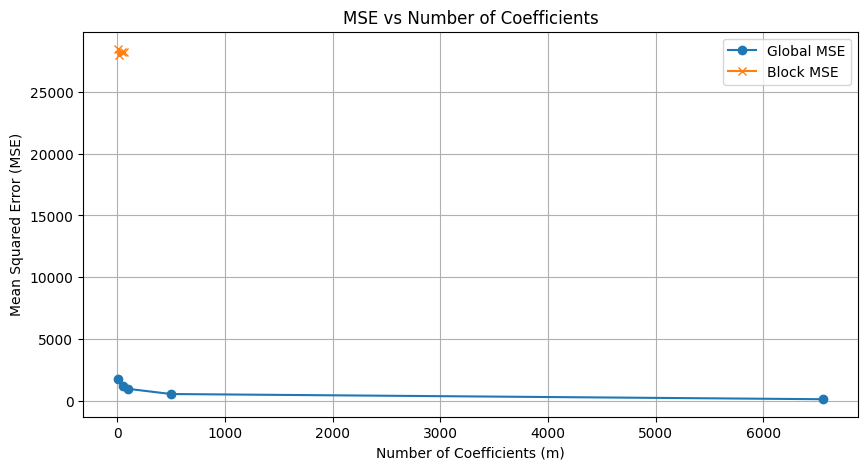

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(m_values, [e[0] for e in errors_global], label="Global MSE", marker='o')
plt.plot(m_values_block, [e[0] for e in errors_block], label="Block MSE", marker='x')
plt.xlabel("Number of Coefficients (m)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs Number of Coefficients")
plt.legend()
plt.grid()
plt.savefig("question3 mse.pdf", format="pdf")


*Question4*

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


h, w = im.shape
padded_matrix = np.zeros((h+2, w+2))

# Corners
padded_matrix[0, 0] = im[0, 0]  # Top-left corner
padded_matrix[0, w+1] = im[0, w-1]  # Top-right corner
padded_matrix[h+1, 0] = im[h-1, 0]  # Bottom-left corner
padded_matrix[h+1, w+1] = im[h-1, w-1]  # Bottom-right corner

# Edges
padded_matrix[0, 1:w+1] = im[0, :]  # Top edge
padded_matrix[h+1, 1:w+1] = im[h-1, :]  # Bottom edge
padded_matrix[1:h+1, 0] = im[:, 0]  # Left edge
padded_matrix[1:h+1, w+1] = im[:, w-1]  # Right edge


# Center (original image)
padded_matrix[1:h+1, 1:w+1] = im




def convolve_2d(y, kernel):
    rows, cols = im.shape
    k_size = kernel.shape[0]




    output = np.zeros_like(image, dtype=float)


    for i in range(rows):
        for j in range(cols):
            region = padded_matrix[i:i + k_size, j:j + k_size]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255)




*Part 2 of Question 4*

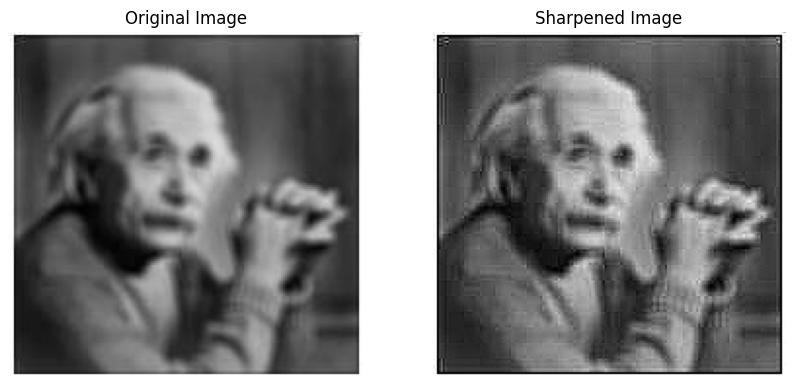

In [37]:
image = Image.open("blurred.jpg").convert("L")
im = np.asarray(image)


kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])





sharpened_image = convolve_2d(im, kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(im, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap="gray")
plt.axis("off")

plt.show()
